# T022 - Ligand-based screening: Neural networks

Developed in the CADD seminar 2020, Volkamer Lab, Charité/FU Berlin 

Authors : 
- Ahmed Atta, CADD Seminar 2020, Charité/FU Berlin
- Sakshi Misra, [Volkamer lab](https://volkamerlab.org), Charité
- Talia B. Kimber, [Volkamer lab](https://volkamerlab.org), Charité
- Prof. Dr. Andrea Volkamer, [Volkamer lab](https://volkamerlab.org), Charité

## Aim of this talktorial

In recent years, use of neural networks in pharmaceutical research has shown promise in addressing diverse problems in drug discovery. In this talktorial, we will get familiar with the basic structure of the artificial neural network. Furthermore, we will learn how to build a simple two layer neural network model and use it to predict the pIC50 values of unknown compounds against our target of interest (EGFR).

### Contents in *Theory*

- Biological background
    - EGFR
    - Compound activity measures
    - Molecule encoding
- What is a neural network ?
- Basic structure of a neural network
- What does a neuron do?
- Activation functions
    - Types of activation functions
       - Step function
       - Linear activation function
       - Non-linear activation function
- Loss function
- How to train a neural network
    - Backpropagation
    - Gradient descent
- Types of neural network
    - Artifical neural network(ANN)
    - Recurrent neural network(RNN)
    - Convolution neural network(CNN)
- Advantages and applications of neural network

### Contents in *Practical*

- Load data and visualize the dataframe
- Data preparation: molecule encoding
- Define keras model
- Choose the most appropriate batch sizes
- Fit keras model
- Evaluate keras model
- Prediction on test data
- Model evaluation on test data
- Plotting to compare the distribution of pIC50 values

### References

 - Theoretical background:
     - Blogpost: Imad Dabbura, *Coding Neural Network — Forward Propagation and Backpropagtion*, [towards data science, accessed April 1st, 2018](https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76).
     - Blogpost: Lavanya Shukla, *Designing Your Neural Networks*, [towardsdatascience, accessed Sep 23rd, 2019](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed)
     - Blogpost: Arthur Arnx, *First neural network for beginners explained (with code)*, [towardsdatascience, accessed Jan 13th, 2019](https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf) 
     - Activation functions: Siddharth Sharma, "ACTIVATION FUNCTIONS IN NEURAL NETWORKS". [_International Journal of Engineering Applied Sciences and Technology, 2020_ **Vol. 4, Issue 12,**, 310-316 (2020).](https://www.ijeast.com/papers/310-316,Tesma412,IJEAST.pdf)
     - Blogpost: Varun Divakar, *Understanding Backpropagation*, [QuantInst, accessed Nov 19th, 2018](https://blog.quantinsti.com/backpropagation/) 
     - Blogpost: ARAVIND PAI, *CNN vs. RNN vs. ANN – Analyzing 3 Types of Neural Networks in Deep Learning*, [Analytics Vidya, accessed Feb 17th, 2020](https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf) 
     
     
- Packages used:
     - [keras](https://keras.io/): Book chapter: "An Introduction to Deep Learning and Keras" in [*Learn Keras for Deep Neural Networks* (2019), **page(s):1-16**](https://doi.org/10.1007/978-1-4842-4240-7).
     - [Sequential model](https://keras.io/api/models/sequential/) in keras

## Theory

### Biological background

#### EGFR

- [Epidermal growth factor receptor (EGFR)](https://de.wikipedia.org/wiki/EGF-Rezeptor) is a transmembrane protein/receptor present on the cell membrane. It is a member of the ErbB family of receptors. They have an extracellular binding  component/domain, a hydrphobic transmembrane component/domain and an intracelluar tyrosine kinase component/domain. 

- EGFRs play an important role in controlling normal cell growth, apoptosis and other cellular functions. 

- It is activated by binding of its specific ligands, upon activation by its growth factor ligands EGFR undergoes a transition from an inactive monomeric form to an active homodimers.

- The EGFR receptor is upregulated in various types of tumors or cancers, so an EGFR inhibition is a type of biological therapy that might stop cancer cell from growing.

#### Compound activity measures

**IC50** is the half maximal inhibitory concentration of the drug which indicates how much a drug is needed to inhibit a biological process by half and in our case the epidermal growth factor receptor as its inhibition helps in slow down or stop cancer cell growth. 

**pIC50** is the negative log of the IC50 value. It is easy for the interpretation and common to measure the potency of compounds (Please refer to [talktorial 001](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/talktorial.ipynb) for further details.)

#### Molecule encoding

For machine learning algorithms, molecules need to be converted into a list of features, in this case molecular fingerprints are used. 

Molecular fingerprints represents or encoded the chemical structures and molecular features in bitstrings form, where at each position "1" represents the presence and "0" represents the absence of a feature.

One of the common fingerprints used is **M**olecular **ACC**ess **S**ystem fingerprints [(MACCS Keys)](https://docs.eyesopen.com/toolkits/python/graphsimtk/fingerprint.html#maccs) which are 166 bits structural key descriptors in which each bit is associated with a [SMARTS](https://docs.eyesopen.com/toolkits/python/oechemtk/glossary.html#term-smarts) pattern (Please refer to [talktorial 004](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T004_compound_similarity/talktorial.ipynb) for further details.)

### What is a neural network?

Neural networks, also known as artificial neural networks (ANNs) are subset of machine learning algorithms. The structure and the name of the neural network is inspired by the human brain, mimicking the way that biological neurons transfers signal to one another.
Artificial neural networks (ANNs) are comprised of node layers, containing an input layer, one or more hidden layers, and an output layer. Neurons are the core processing unit of the network. The operations of a complete neural network is straightforward: input layer receives the input and the output layer predicts our final output. In between there exists hidden layers which performs the computations required by our network. 

Each node, or artificial neuron, connects to another via channels meaning a neuron of the column *n* can only be connected to neurons from column *n-1* and *n+1*. Every neural connection or channel has an associated numerical value known as weights. If the output of any individual neuron is above certain threshold value, that node is activated, meaning sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network. We will discuss more about the structure in the next section.

<div>
<img src="images/neural_network.png" width="500"/>
</div>

*Figure 1:* Representation of a two-layer neural network. Figure is taken from the article [Coding Neural Network — Forward Propagation and Backpropagtion](https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76)



### Basic structure of a neural network

Neural network consists of three main layers as shown below:
1. Input layer
2. Hidden layers 
3. Output layer 

<div>
<img src="images/basic_structure.png" width="500"/>
</div>

*Figure 2:* Figure shows the basic structure of a neural network. It is taken from the article: "*Designing Your Neural Networks*", Lavanya Shukla, [towardsdatascience](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed)

Lets take a deeper look at each layer,


- **Input neurons or input layer**
   - This layers represents the number of features which are used to make the predictions.
   - The input vector needs one input neuron per feature. For example as shown in the figure below, the image is composed of 28 * 28 = 784 pixels, each pixel will be fed as input to each neuron of the first input layer.
   
 
<div>
<img src="images/input_vector.png" width="500"/>
</div>

*Figure 3:* Figure shows a hand written digit composed of 784 pixels which is given as an input to our first input layer neurons. It is taken from the article: "*Designing Your Neural Networks*", Lavanya Shukla, [towardsdatascience](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed)


- **Hidden layers and neurons per hidden layers**
    - The number of hidden layers and the neurons is totally dependent on the type of the problem and how much deep a neural network you want. In general, using same number of neurons for all hidden layers will suffice but for some datasets, having a large first layer and following it up with smaller layers will lead to a better performance as first layer can learn a lot of low-level features that can feed into the next subsequent layers which can learn higher order features.
    - In the figure below, the input was a dog image broken into pixels, then several layers learn the different features and finally the network outputs it as a dog.

<div>
<img src="images/layer.png" width="500"/>
</div>

*Figure 4:* Figure shows the hidden layers learning certain features of a dog image. It taken from the article: "*Designing Your Neural Networks*", Lavanya Shukla, [towardsdatascience](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed)


- **Output neurons or output layer**
  - Output layer contains the number of neurons which represents the number of predictions you want to make and the neuron with highest value probability determines the output.
  - **Regression**: For regressions tasks, this can be a value like predicting the price of the house or predicting stock prices.
  - **Classification**: For binary classification tasks, we have output neuron per positive class which represents the probability of the positive class whereas for multi-class classification, we have an output neuron per class and we use the certain activation function on the output layer to ensure the final probabilities sum to 1.

### What does a neuron do ?

Neurons are the basic units of a neural network, so lets understand the operations done by each neuron:

<div>
<img src="images/neuron.png" width="500"/>
</div>

*Figure 5:* Operations done by a neuron. Figure is taken from the artcile [First neural network for beginners explained (with code)](https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf)

- First, the values from the previous layer's neurons adds up and sent to the current neuron. In the figure above, there are 3 inputs (*X1, X2, X3*) coming to the neuron, meaning 3 neurons are connected to our current neuron. 
- Each connection or channel has assigned a numerical value known as **weight**(*w1, w2, w3*). Weight determines the connection between the neurons or in other words, a weight decides how much influence the input will have on the output. The inputs are multiplied by the corresponding weights and their sum is sent as input to the neurons in the hidden layer.
- Each of these neurons is associated with a numerical value called the **bias** which is then added to the input sum.
- Both weights and bias, commonly referred to as *w* and *b*, are the learnable parameters which can be tuned while training the model to get the better performance of a model. The equation below summarises the operations done by our neuron:

$$Y = \sum(w1*x1 + w2*x2 + w3*x3) + bias$$ 

- After all those summations, the value is then passed through a threshold function called the **activation function**. The result of the activation function determines if the particular neuron will get activated or not. An activated neuron transmits data to the neuron of the next layer over the channels. In this manner the data is propagated through the network which is known as **forward propagation**. There are many types of activation functions which we will discuss in detail in the next section.

### Activation function

#### What is a activation function?

[Activation function](https://en.wikipedia.org/wiki/Activation_function) are the mathematical equations that determine the output of a neural network. Each neuron is applied by this function and it determines whether the neuron should be activated or not. 

The value of **Y** can be anything ranging from -inf to +inf . The neuron doesn't know the bounds of the value, so how do we decide whether the neuron should be activated or not? Then, the activation functions comes into the picture which helps in normalizing the output of each neuron to a range between 1 and 0 or between -1 and 1 depending on the type of the activation function used. Activation function simply works as a "gate" in between the input feeding the current neuron and its output going to the next layer as shown below, 

<div>
<img src="images/activation.png" width="500"/>
</div>

*Figure 6:* Figure shows the activation function applied on a neuron. It is taken from the blogpost: [7 Types of Neural Network Activation Functions: How to Choose?](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

#### Types of activation function

Activation functions can be basically divided into 3 types:

##### Binary step function:

It is a threshold-based activation function. Activation functions can be as simple as a [step function](https://en.wikipedia.org/wiki/Step_function) that turns the neuron's output "on" or simply neuron is activated when the **Y** value is above threshold, otherwise its "off". Simply put in an equation:

\begin{equation}
\text{Activation function(A)} = \text{"activated" if Y > threshold, else not}
\end{equation}

\begin{equation}
\text{Alternatively, A = 1 if Y > threshold, 0 otherwise}
\end{equation}

<div>
<img src="images/step.png" width="300"/>
</div>

*Figure 7:* Representation of a step function. Figure is take from the blogpost: [7 Types of Neural Network Activation Functions: How to Choose?](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

Step function can work great with binary classifiers but it does not allow multi-value output for examples if we want to build a multi-class classifier model, we would want the network to activate only 1 neuron and others should be 0 but it won't be possible with a step function.

##### Linear activation function: 

A linear activation function takes the form:
$$\boxed{A = cx}$$

<div>
<img src="images/linear.png" width="300"/>. 
</div>

*Figure 8:* Representation of a linear activation function. Figure is take from the blogpost: [7 Types of Neural Network Activation Functions: How to Choose?](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/) 

It is a straight line function where the activation is proportional to input which is the weighted sum from neuron. It is better than a step function function because it gives range of activations, meaning multiple output is possible not just yes or no. But it also has some limitations:

1. **Not possible to use backpropagation(gradient descent)** to train the model because the derivative of a linear function is a constant and has no relation with input so it is not possible to go back and tune weights in the network.

2. **All layers will collapse into one**, with linear activation functions, no matter how many layers are the there in the neural network, if all are linear in nature, the final layer will be a linear functions of the first layer because a linear combination of linear functions will still be a linear function.
That means two layers or N layers can be replaced by a single layer, so a linear activation function will turn the whole neural network into just one layer.

##### Non-linear activation function:

Non-linear function addressed the problems of a linear activation function. Most neural networks uses non-linear activation functions as it makes easy for the model to generalize or adapt with variety of data and to differentiate between the output.

There are many types of non-linear activation functions, we will discuss 4 most commonly used activation function (you can also refer the supplementary section to see how the functions are defined and plotted).


1) **Sigmoid function (σ)**: It takes the form: $$\boxed{f(x)=\frac{1}{1+e^{−x}}}$$ 

   -  The sigmoid curve looks like a *S*-shaped curve as shown in the figure below. 
   - It has a "smooth gradient" which prevents jumps in the output values and it bound the output values between 0 and 1.
   - It's recommended to be used only on the output layer so that we can easily interpret the output as probabilities since it has restricted output between 0 and 1. 
   - If you notice in the figure below, x values between -2.5 to 2.5, Y values are very steep, so any small change in values of x in that region will cause value of y to change significantly. It tends to bring the activations to either side of the curve.
   - Another advantage of this activation function, unlike linear function, the output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function.
   - But it has a major drawback, for very high or very low values of X, there is almost no change in y values or the prediction, causing a [**vanishing gradient**](https://towardsdatascience.com/the-vanishing-exploding-gradient-problem-in-deep-neural-networks-191358470c11) problem. This can cause the network to learn slowly or refuses to learn further. 
     
<div>
<img src="images/sigmoid.png" width="400" >
</div>

*Figure 9:* Representation of a "sigmoid" function. Figure by Sakshi Misra.



2) **Hyperbolic Tangent function or TanH**:  It takes the form: $$\boxed{f(x)= tanh(x) = \frac{2}{1+e^{-2x}}−1}$$ it looks very similar to sigmoid function, it can also be written as $$\boxed{tanh(x)= \text{2 sigmoid (2x)}-1}$$

   - It has same characteristics as sigmoid like non-linear in nature, output is bound between -1 and 1 but it has deeper [derivative s](https://en.wikipedia.org/wiki/Derivative) which means it has stronger gradient than sigmoid as shown in the figure below. Deciding between sigmoid and tanh depends upon your requirement of gradient strength.
   - The disadvantage that it shares with sigmoid function is that the it also has vanishing gradient problem.

<div>
<img src="images/tanh.png" width="400"/>
</div>

*Figure 10:* Representation of a "tanh" function. Figure by Sakshi Misra


3) **Rectified Linear Unit (ReLU)**: ReLu takes the form: $$\boxed{f(x) = max\{ 0,x\}}$$

  - As shown below, ReLu gives an output *x* if *x* is positive and *0* otherwise.
  - It is not bound though. The range of ReLu is [0, inf).
  - The only issue is that when inputs approach to zero or negative, the gradient of the function becomes zero hence, the network cannot learn and perform backpropagation.
  - ReLU is the most commonly used activation function, one of the reasons could be its sparsity in the activation. Imagine if we have a deep neural network with many neurons, using a sigmoid of tanh will cause all the neurons to be activated, this is costly. But with ReLu, only few neurons will be activated and thereby making the activations sparse and efficient.

<div>
<img src="images/relu.png" width="400"/>
</div>

*Figure 11:* Representation of a "ReLU" function. Figure by Sakshi Misra


4) **Leaky Rectified Linear Unit**: ReLu takes the form: $$\boxed{f(x)= \max\{ α ∗ x,x\}}$$

   - This is the variation of ReLU which has a small positive slope in the negative area.
   - The range of the Leaky ReLU is (-infinity to infinity).
   - It overcomes the zero gradient issue from ReLU and assigns α which is a small value for x≤0.

<div>
<img src="images/leaky.png" width="400"/>
</div>

*Figure 12:* Representation of a "Leaky ReLU" function. Figure by Sakshi Misra


Now which activation function do we choose? It totally depends on the type of the problem you are solving, you can choose an activation function which will approximate the function faster and lead to faster raining process. There are other activation functions too, but the general idea remains the same. Please refer an article: H. N. Mhaskar, [How to Choose an Activation Function](https://papers.nips.cc/paper/1993/file/51ef186e18dc00c2d31982567235c559-Paper.pdf) for more details.

### Loss function 

Before diving into how to train a neural network lets discuss about **loss** and **loss function**. In neural network, we an objective function i.e. to minimize the prediction error, so this objective function is often referred to as cost function or loss function. Through loss function we calculate loss or prediction error basically. Loss function is one of the important components of training the neural networks. 

Keras and tensorflow have various inbuilt loss functions, we will be covering some of them:

- **Mean Squared Error (MSE)**: It is used for regression tasks, as the name suggests this loss is calculated by taking the mean of squared differences between actual(target) and predicted values. 

- **Binary Crossentropy (BCE)**: BCE loss is used for the binary classification tasks. We just need one output node to classify the data into two classes. The output value should be passed through a sigmoid activation function and the range of output is (0 – 1)

- **Categorical Crossentropy (CC)**: When we have a multi-class classification task, we can use CC loss function. If we are using CCE loss function, there must be the same number of output nodes as the classes. And the final layer output should be passed through a softmax activation so that each node output a probability value between (0–1).


The choice of loss function is directly related to the activation function used in the output layer of your neural network. For example, in our case we have to predict the pIC50 value of drug molecules so it is a regression task. We can use linear activation function in the output layer and mean square error (mse) as our loss function.

You can refer to article: [Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/) for more details.

### How to train a neural network ?

When we start with [forward propagation](https://en.wikipedia.org/wiki/Feedforward_neural_network), we randomly assign weights in our network. Obviously, it won’t give very good results, so how the network figures this out? 

During the training process along with the input our network also has the output fed to it. The predicted output is compared against the actual output to realize the error in prediction, the magnitude of the error indicates how wrong we are. This error is computed using loss function which we want to minimize and make it much lower at the end of training. It can be done by calculating the gradient by back propagating in the network and adjust the weights such that the network can predict the output correctly. 

There are major two algorithms which helps in training the neural network model:

- [Back propagation](https://de.wikipedia.org/wiki/Backpropagation): gradient computation  
- [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.): optimization method to minimize the loss or cost function

#### Backpropagation

Backpropagation is an efficient method of calculating the derivatives or gradient. This algorithm trains a neural network through a method called chain rule. In simple terms, after each forward pass through a network, backpropagation performs a backward pass while adjusting the model’s parameters (weights and biases) which aims to minimize the cost function.

#### Gradient descent 

Gradient is the vector which points to the direction of the steepest increase of the function. Since, we want to minimize our function, we will take a step in the opposite direction of gradient. Generally we want to control how big of step we make, this is achieved by choosing the most important hyper parameter which is called [learning rate](https://techburst.io/improving-the-way-we-work-with-learning-rate-5e99554f163b). Mostly people choose learning rate by trying out a bunch of numbers and using the one that looks to work best. 

In our neural network we have weights which values we want to improve, if we compute the gradient of the loss function w.r.t. to our weights and take small steps in the opposite direction of gradient, our loss will gradually decrease until it converges to some local minima, this algorithm is called gradient descent. So in short, it is the process of descending through the gradient i.e. adjusting the parameters of the model to minimize the loss function and achieve our target, which is to predict close to the original value. There many types of gradient descent method:

- **Stochastic Gradient Descent(SGD)**: When we train the model to optimize the loss function using only single sample from our dataset, it is called Stochastic Gradient Descent.
- **Batch Gradient Descent**: When we train the model to optimize the loss function using the the whole dataset, it is called Batch Gradient Descent.
- **Mini-Batch Gradient Descent**: Batch gradient descent takes a lot of time and is therefore somewhat inefficient. If we look at SGD, it is trained using only 1 example. There is a possibility that the model may get too biased with the peculiarity of that particular example when we use SGD. So, we use the mean of a batch of 10–1000 examples to check the optimize the loss in order to deal with the problems.


### Types of neural network

We will focus on major three important types of neural networks:
- Artificial Neural Networks (ANN)
- Convolution Neural Networks (CNN)
- Recurrent Neural Networks (RNN)

Lets discuss each neural network in detail.

#### Artificial Neural Networks (ANN)

It is also known as feed-forward neural network because inputs are processed only in the forward direction. The information flow in this network is unidirectional. We have already discussed above about the basic structure and working of the artificial neural network and we will implement the same in the practical part below. 

There are some challenges faced  with ANN such as: 
- ANN cannot capture sequential information in the input data which is required for dealing with sequence data
- One common problems with all neural networks is the vanishing and exploding gradient
- While solving an image classification problem, the 2D image is converted into 1D which makes number of trainable parameters drastically increases with the size of the image. 

#### Recurrent Neural Networks (RNN)

Let us first try to understand the difference between RNN and ANN
<div>
<img src="images/RNN.png" width="300"/>
</div> 

*Figure 13:* Figure shows the difference between RNN and ANN. It is taken from the blogpost: [CNN vs. RNN vs. ANN – Analyzing 3 Types of Neural Networks in Deep Learning](https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/)

As you can see, RNN has recurrent connection on the hidden state. They are bit more complex and the data flows in multiple direction. RNN overcomes some of the problem faced with ANN by capturing the sequential information present in the input data. It also shares parameters across different time steps which is known as **parameter sharing**. But RNNs also suffer from vanishing and exploding gradient.

You can refer the article [Fundamentals of Deep Learning – Introduction to Recurrent Neural Networks] to learn more about how RNNs work and how to build one in Python.


#### Convolution Neural Networks (CNN)

CNNs are widely used neural networks especially for image and video processing tasks. **Filters** a.k.a. **kernels** are the building blocks of CNNs. They are used to extract the relevant features from the input data using the convolution operation. There are some major advantages of using CNN such as:
- CNN learns the filters automatically without mentioning it explicitly. These filters help in extracting the right and relevant features from the input data.
- CNN also helpful in capturing the **spatial features** which refers to the arrangement of pixels and the relationship between them in an image. These spatial features help us in identifying the object accurately.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/1oB3S5yHHhvougJkPXuc8og.gif" width="500" align="center">

*Figure 14:* Gif represents the image classification using CNN. It is taken from the blogpost: [CNN vs. RNN vs. ANN](https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/)


If you want to explore more about CNN, please refer to the article [Demystifying the Mathematics Behind Convolutional Neural Networks (CNNs)](https://courses.analyticsvidhya.com/courses/convolutional-neural-networks-cnn-from-scratch?utm_source=blog&utm_medium=cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning).

### Advantages and applications of neural network

#### Advantages of a neural network 

- **Organic learning**: Neural networks have the ability to learn by themselves by extracting the important features present in the input data. The outputs aren't limited entirely by inputs. Neural networks have the ability to generalize their inputs.
- **Non linear data processing**: They have the ability to learn and model non-linear and complex relationships. 
- **Fault tolerance**: They have potential for high fault tolerance. When these networks are scaled across multiple machines and multiple servers, they can debug and diagnose the problem by its own.

#### Applications of neural networks

There are various applications of neural networks in various fields such as:
- Facial recognition
- Language processing and translation
- Route detection
- Speech recognition
- Forecasting

Please refer to the article: "*Neural networks – advantages and applications*", [ScienceDirect](https://doi.org/10.1016/B978-0-444-81892-8.50036-5) for further details.

## Practical

The first step is to import all the necessary libraries and define the functions and classes we intend to use in this notebook.

In [1]:
from pathlib import Path
from warnings import filterwarnings
import time

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline
from pathlib import Path

# Silence some expected warnings
filterwarnings("ignore")

In [2]:
# extension used to show lint errors
%load_ext pycodestyle_magic

In [3]:
%pycodestyle_on

###  Load data and visualize the dataframe

Let's load our data which is the subset of ChEMBL dataset and visualize the dataframe, the important columns in the dataframe are:

- CHEMBL-ID
- SMILES string of the corresponding compound
- Measured affinity: pIC50

In [4]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

df = pd.read_csv(DATA/'CHEMBL25_activities_EGFR.csv',
                 lineterminator='\n')  # NBVAL_CHECK_OUTPUT

In [5]:
# Check the dimension and missing value of the data
print("Shape of dataframe : ", df.shape)
df.info()

# Look at head
df.head()

Shape of dataframe :  (3906, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3906 non-null   int64  
 1   chembl_id         3906 non-null   object 
 2   IC50              3906 non-null   float64
 3   units             3906 non-null   object 
 4   canonical_smiles  3906 non-null   object 
            3906 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 183.2+ KB


,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50\r
0,1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


In [6]:
# Keep the necessary columns
chembl_df = df[["chembl_id", "canonical_smiles", "pIC50\r"]]
chembl_df.head()
# NBVAL_CHECK_OUTPUT

,chembl_id,canonical_smiles,pIC50\r
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,CHEMBL3678951,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,CHEMBL504034,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,CHEMBL158797,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


### Data Preparation

#### Molecule encoding
Now we have to convert the SMILES string to numerical data so that we can perform machine learning algorithm on it and we can use already defined function `smiles_to_fp` from Talktorial **T007** which generate fingerprints from SMILES. 
There is a choice incorporated between **MACCS**, **morgan2** and **morgan3** but we will use MACCS fingerprints because MACCS keys are short (166 bit) as compared to others (2048 bit). (Please refer to [talktorial 007](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T007_compound_activity_machine_learning/talktorial.ipynb) for further details on the functions defined for molecule encoding. )

In [7]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.

    """

    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}."
              " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [23]:
# convert all SMILES strings to MACC fingerprints
fingerprints_df = pd.DataFrame([smiles_to_fp(smile) for smile in
                                chembl_df['canonical_smiles']])

# Look at head
print("Shape of dataframe : ", fingerprints_df.shape)
fingerprints_df.head(3)  # NBVAL_CHECK_OUTPUT

Shape of dataframe :  (3906, 167)


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0


Now we can define **X** and **y** which are the features used to train the model and target values respectively. In our case, features are the bit vectors and the target value is pIC50 values of the drug molecules which we want to predict.

After defining X and y, we can use `train_test_split` from scikit-learn library to split the data into training and testing datasets.

In [9]:
# Assign X and y value
X = fingerprints_df
y = chembl_df[['pIC50\r']]

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Print the shape of training and testing data
print("Shape of training data : ", X_train.shape)
print("Shape of testing data : ", X_test.shape)

Shape of training data :  (2734, 167)
Shape of testing data :  (1172, 167)


### Define keras model

Now we will use [keras](https://keras.io/getting_started/) to define our neural network model. Goal is to train a neural network model with the training dataset and use test datasets to predict the pIC50 value for the drug molecules which it has never seen before.

We start by **defining** a keras model which is defined as a sequence of layers. We create a [Sequential model](https://keras.io/api/models/sequential/) and add layers. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument. We have used [rectified linear unit activation function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) in the hidden layers and linear in the output layer. 

Now, after defining the model, we can [compile](https://keras.io/api/models/model_training_apis/#compile-method) it. It uses the efficient numerical libraries to chooses the best way to represent the network for training and making predictions. When compiling we have to specify some additional parameters such as optimizer, loss, metrices etc. we would like to report. 

In this case we used **mean square error** as a loss argument and we defined optimizer to be **adam** which is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 

To learn more about the Adam version of stochastic gradient descent see the post: [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

Finally, we will report mean square error(mse) and mean absolute error(mae) as our metrices.

In [22]:
def NN_model(hidden1, hidden2):
    """
    creating neural network from two hidden layer
    using relu as activation function in two hidden layer
    and linear in the output layer

    parameters
    ----------
    hidden1 : Int
         number of neuons in first hidden layer

    hidden2: Int
         number of neuons in second hidden layer
    Returns
    --------
    model
        fully connected neural network model with two hidden layer
    """

    model = Sequential()
    # first hidden layer
    model.add(Dense(hidden1, activation='relu', name="layer1"))
    # second hidden layer
    model.add(Dense(hidden2, activation='relu', name="layer2"))
    # output layer
    model.add(Dense(1, activation='linear', name="layer3"))
    # compile model
    model.compile(loss='mean_squared_error',
                  optimizer='adam', metrics=['mse', 'mae'])
    return model

### Choose the most appropriate batch sizes 

**Bath sizes** refers to the number of samples that will be propagated through the network to train it. 
Batches can made up of:
- **Batch Gradient Descent**: when all training datasets is used as a batch.
- **Stochastic Gradient Descent**: when single sample is used as a batch.
- **Mini-Batch Gradient Descent**: when batch size is more than one sample but less that full training data.

We have tried passing mini-batches and plotted the loss.

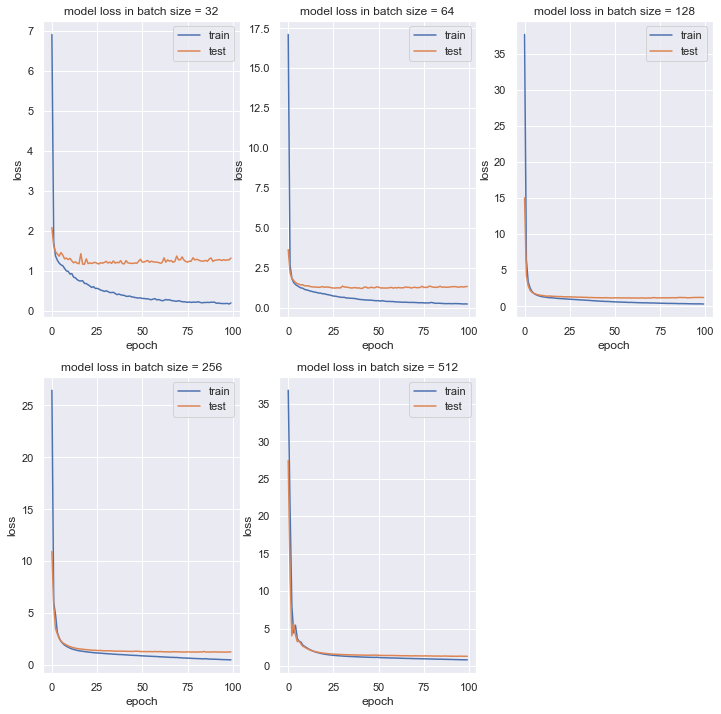

In [29]:
# trying different batch sizes
batch_sizes = [32, 64, 128, 256, 512]

# size of figure
fig = plt.figure(figsize=(12, 12))
sns.set(color_codes=True)
for index in range(0, 5):
    fig.add_subplot(2, 3, index+1)
    model = NN_model(64, 32)
    # fit model on X_train and y_train data
    history = model.fit(X_train, y_train,
                        batch_size=batch_sizes[index],
                        validation_data=(X_test, y_test),
                        verbose=0, epochs=100)

    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend(['train', 'test'], loc='upper right')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('model loss in batch size = '+str(batch_sizes[index]))
plt.show()

### Fit keras model

Now we will call [model.fit()](https://keras.io/api/models/model_training_apis/#fit-method) method which needs several parameters like **x**: Input data, **y**: Target data, batch size, epochs etc.
We specified batch size to be 512 and epochs to be 100. 

One **epoch** means when an entire dataset is passed forward and backward through the neural network **once**.

In [12]:
# save the model
filepath = "weights_CV.best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0,
                             save_best_only=True, mode='min')
callbacks_list = [checkpoint]


# fit the model
model.fit(X, y, epochs=100, batch_size=512,
          callbacks=callbacks_list, verbose=0)

### Evaluate keras model

After training the model, we can use [model.evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) to check the performance or score of our model. It will report the loss, mse and mae values.

In [13]:
# Evalute the model on training datausing `evaluate`
print("Evaluate on training data")
score = model.evaluate(X, y, verbose=0)
print(f'score:{score}')

Evaluate on training data
score:[0.5000921487808228, 0.5000921487808228, 0.5345600843429565]


### Prediction on test data

#### Loading the test data (EGFR_test_set.csv)

We will use another dataset to test the model. This dataset contains some SMILES compounds without the pIC50 values, we can load the dataset using pandas and visualize the dataframe.

In [14]:
# load test data
test_df = pd.read_csv(DATA/'test.csv',
                      lineterminator='\n')
test_df.head()  # NBVAL_CHECK_OUTPUT

,id,canonical_smiles\r
0,1,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccc...
1,2,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1\r
2,3,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1\r
3,4,O=C(/C=C/CN1CC[NH+](C)CC1)N1Cc2sc3ncnc(N[C@H](...
4,5,S(=O)(=O)(NC(=O)Cn1c(C)ncc1[N+](=O)[O-])c1ccc(...


We used the same `smiles_to_fp` function and convert the SMILES strings in test data into MACCS fingerprints.

In [15]:
# convert all smiles in test file to MACC keys
maccs_test_df = pd.DataFrame([smiles_to_fp(smile) for smile in
                              test_df['canonical_smiles\r']])
maccs_test_df.shape

(60, 167)

We then can use [model.predict](https://keras.io/api/models/model_training_apis/#predict-method) to predict the pIC50 values of test molecules.

In [16]:
# prediction on test data
pred = model.predict(maccs_test_df)

predicted_pIC50 = pd.DataFrame(pred, columns=['Predicted pIC50 values'])
predicted_pIC50_df = test_df.join(predicted_pIC50)

predicted_pIC50_df.head(3)

,id,canonical_smiles\r,Predicted pIC50 values
0,1,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccc...,5.721431
1,2,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1\r,5.610683
2,3,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1\r,6.137012


### Model evaluation on test data

In [17]:
# model evaluation on test data
print("Evaluate on test data")
score = model.evaluate(maccs_test_df, pred)
print(f'score: {score}')

Evaluate on test data
2/2 [==============================] - 0s 2ms/step - loss: 1.7148e-13 - mse: 1.7148e-13 - mae: 2.8213e-07
score: [1.7147764599326903e-13, 1.7147764599326903e-13, 2.8212863867338456e-07]


### Plotting to compare the distribution of pIC50 values

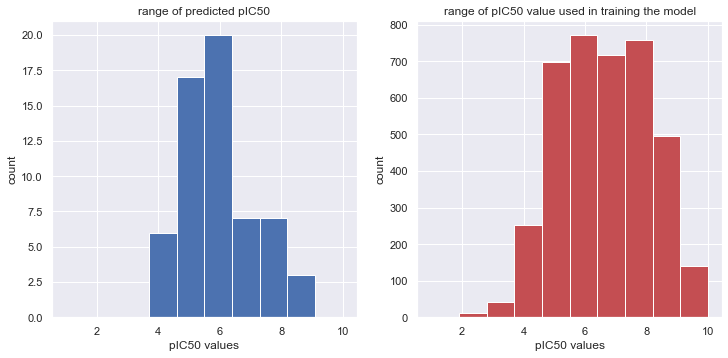

In [18]:
# Histogram plot to compare the distribution
# of training pIC50 values and the predected pIC50
plt.figure(figsize=(12, 12))
sns.set(color_codes=True)

plt.subplot(221)
plt.hist(predicted_pIC50_df["Predicted pIC50 values"],
         facecolor='b', histtype='barstacked', range=(1, 10))
plt.xlabel('pIC50 values')
plt.ylabel('count')
plt.title('range of predicted pIC50')

plt.subplot(222)
plt.hist(chembl_df["pIC50\r"], facecolor='r', range=(1, 10), bins=10)
plt.xlabel('pIC50 values')
plt.ylabel('count')
plt.title('range of pIC50 value used in training the model')
plt.show()
sns.set()

## Discussion





TODO We can see the predicted values are also right skewed and the training values are also right skewed

## Quiz

- TODO 

-------
## Supplementary section

In this section we have defined activation functions and forward propagation function for better understanding of the concept.

Lets define 4 activation functions which were discussed in the theory section above.

In [19]:
# Define activation functions that can be used in forward propagation
def sigmoid(input_array):
    """
    Computes the sigmoid of input element-wise.

    Parameters
    ----------
    input_array : array
             input values.

    Returns
    -------
    Activation_function : array
             post activation output.
    input_array : array
             input values.
    """
    Activation_function = 1 / (1 + np.exp(-input_array))

    return Activation_function, input_array


def tanh(x):
    """
    Computes the Hyperbolic Tagent of input element-wise.

    Parameters
    ----------
    input_array : array
             input values.

    Returns
    -------
    Activation_function : array
             post activation output.
    input_array : array
             input values.
    """
    Activation_function = np.tanh(input_array)

    return Activation_function, input_array


def relu(input_array):
    """
    Computes the Rectified Linear Unit (ReLU) element-wise.

    Parameters
    ----------
    input_array : array
             input values.
    Returns
    -------
    Activation_function : array
             post activation output.
    input_array : array
             input values.
    """
    Activation_function = np.maximum(0, input_array)

    return Activation_function, input_array


def leaky_relu(input_array):
    """
    Computes Leaky Rectified Linear Unit element-wise.

    Parameters
    ----------
    input_array : array
             input values.

    Returns
    -------
    Activation_function : array
             post activation output.
    input_array : array
             input values.
    """
    Activation_function = np.maximum(0.1 * input_array, input_array)

    return Activation_function, input_array

2:1: E302 expected 2 blank lines, found 0


We can also plot all the activation function using `matplotlib.plt` library as shown below.

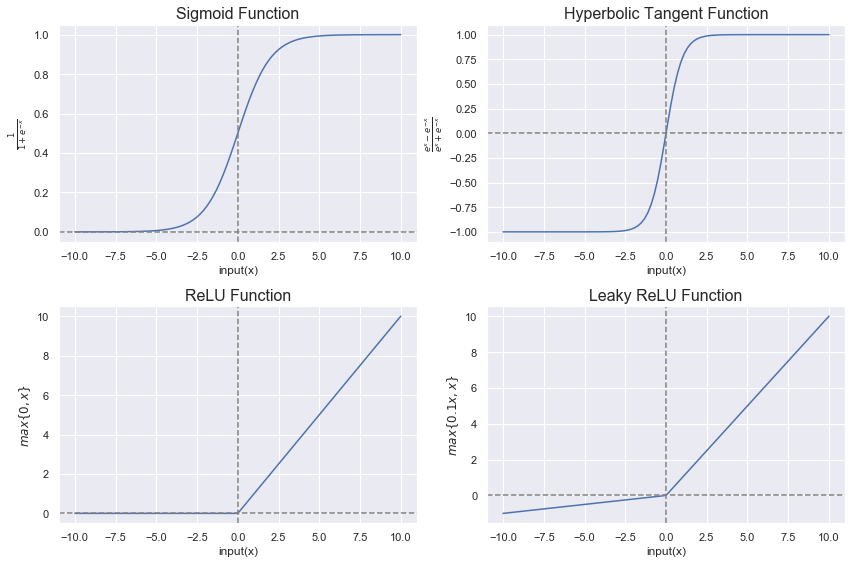

In [24]:
# Plot the 4 activation functions
input_array = np.linspace(-10, 10, 100)

# Computes post-activation outputs
A_sigmoid, input_array = sigmoid(input_array)
A_tanh, input_array = tanh(input_array)
A_relu, input_array = relu(input_array)
A_leaky_relu, input_array = leaky_relu(input_array)

# Plot sigmoid function
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(input_array, A_sigmoid, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$\frac{1}{1 + e^{-x}}$")
plt.title("Sigmoid Function", fontsize=16)

# Plot tanh function
plt.subplot(2, 2, 2)
plt.plot(input_array, A_tanh, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$\frac{e^x - e^{-x}}{e^x + e^{-x}}$")
plt.title("Hyperbolic Tangent Function", fontsize=16)

# plot relu function
plt.subplot(2, 2, 3)
plt.plot(input_array, A_relu, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$max\{0, x\}$")
plt.title("ReLU Function", fontsize=16)

# plot leaky relu function
plt.subplot(2, 2, 4)
plt.plot(input_array, A_leaky_relu, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$max\{0.1x, x\}$")
plt.title("Leaky ReLU Function", fontsize=16)
plt.tight_layout()

Now, we will define forward propagation function using classes, this implementation can help you understand the concept practically.

First we converted our input bit vectors data into lists and then defined a class named `Layer_Dense`. It has two properties, weights and biases. We have randomly assigned their values and defined a function named `forward_pass` which calculates the **dot product** of the input values and weights and add it to the bias values. 

Now, as we know activation function is applied on every neuron, so we have created another class named `activation_function`, here we have defined the a function named `ReLU`, meaning we will use ReLU activation function in this case. 

After defining classes and their attributes, we create an object from both the classes and called the functions on our data. We can now print the output values as shown.

**Note:** The predicted values will differ in every run because the weights are randomly assigned.  

In [26]:
# convert our input data to list
fingerprints_df_list = fingerprints_df.values.tolist()

# create forward pass function with one hidden layer
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward_pass(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_function:
    def ReLU(self, inputs):
        self.output = np.maximum(0, inputs)


# object
layer1 = Layer_Dense(167, 50)
layer2 = Layer_Dense(50, 1)
activation1 = Activation_function()
activation2 = Activation_function()

# function calling
layer1.forward_pass(fingerprints_df_list)
layer2.forward_pass(layer1.output)
activation1.ReLU(layer1.output)
activation2.ReLU(layer2.output)

print(activation2.output)

5:1: E302 expected 2 blank lines, found 1
9:1: W293 blank line contains whitespace


[[0.08964509]
 [0.        ]
 [0.38412751]
 ...
 [0.        ]
 [0.        ]
 [0.48200956]]
